In [1]:
# 1. Import Libraries
import os
import sys
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#2. Load Data 
df= pd.read_csv("youth_unemployment_global.csv")

In [7]:
# 3. Data Overview
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            17290 non-null  object 
 1   CountryCode        17225 non-null  object 
 2   Year               17290 non-null  int64  
 3   YouthUnemployment  7981 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 540.4+ KB


Country                 0
CountryCode            65
Year                    0
YouthUnemployment    9309
dtype: int64

In [9]:
# 4. Data Cleaning and Preprocessing
df.drop_duplicates(inplace=True)
df = df.fillna(method='ffill')
df.isnull().sum()

C:\Users\Huypz\AppData\Local\Temp\ipykernel_2100\989188426.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


Country              0
CountryCode          0
Year                 0
YouthUnemployment    0
dtype: int64

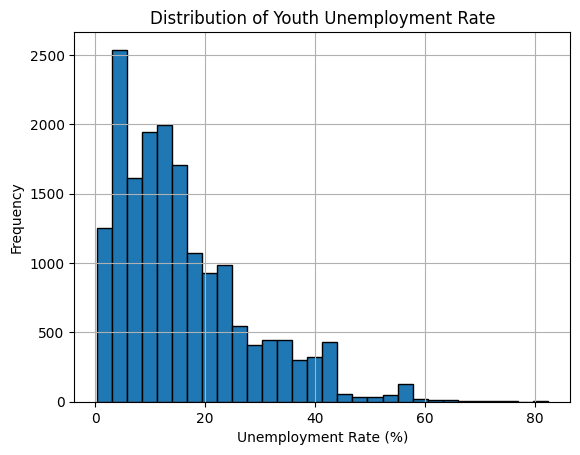

In [11]:
# 5. Quick Data Analysis
df.hist(column='YouthUnemployment', bins=30, edgecolor='black')
plt.title('Distribution of Youth Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency')
plt.show()

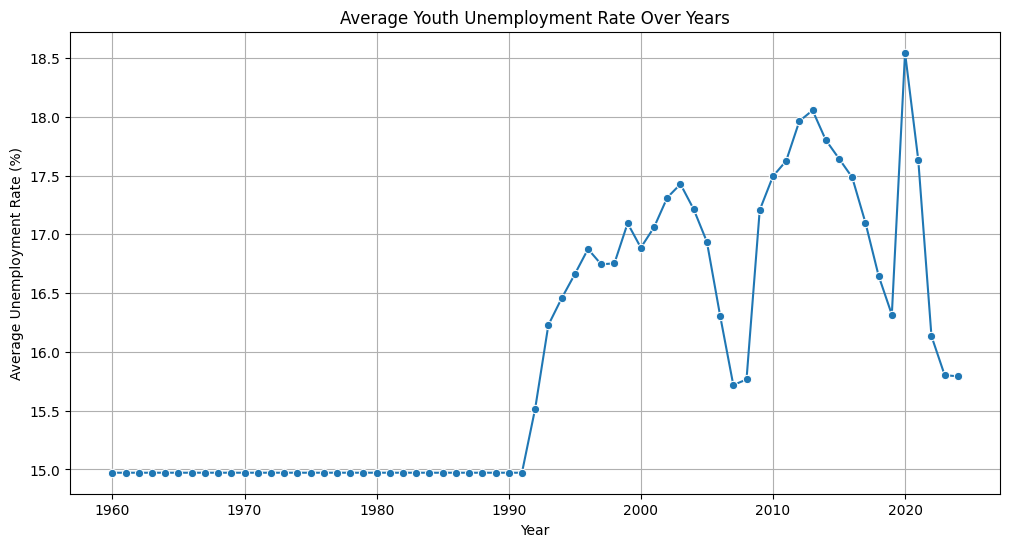

In [16]:
# 6. Data analysis and Visualization
yearly_avg = df.groupby('Year')['YouthUnemployment'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=yearly_avg, x='Year', y='YouthUnemployment', marker='o')
plt.title('Average Youth Unemployment Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid()
plt.show()

C:\Users\Huypz\AppData\Local\Temp\ipykernel_2100\2378212994.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countries, y=values, palette=colors)


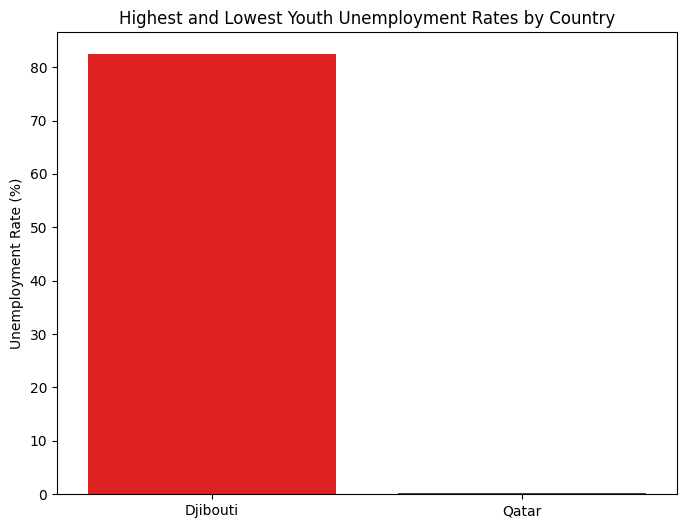

In [17]:
# 6.1 Highest and Lowest Youth Unemployment Rates by Country
highest_unemployment = df.loc[df['YouthUnemployment'].idxmax()]
lowest_unemployment = df.loc[df['YouthUnemployment'].idxmin()]
# Data for highest and lowest unemployment
countries = [highest_unemployment['Country'], lowest_unemployment['Country']]
values = [highest_unemployment['YouthUnemployment'], lowest_unemployment['YouthUnemployment']]
colors = ['red', 'green']
plt.figure(figsize=(8,6))
sns.barplot(x=countries, y=values, palette=colors)
plt.title('Highest and Lowest Youth Unemployment Rates by Country')
plt.ylabel('Unemployment Rate (%)')
plt.show()

C:\Users\Huypz\AppData\Local\Temp\ipykernel_2100\4199117208.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_2020, x='YouthUnemployment', y='Country', palette='viridis')


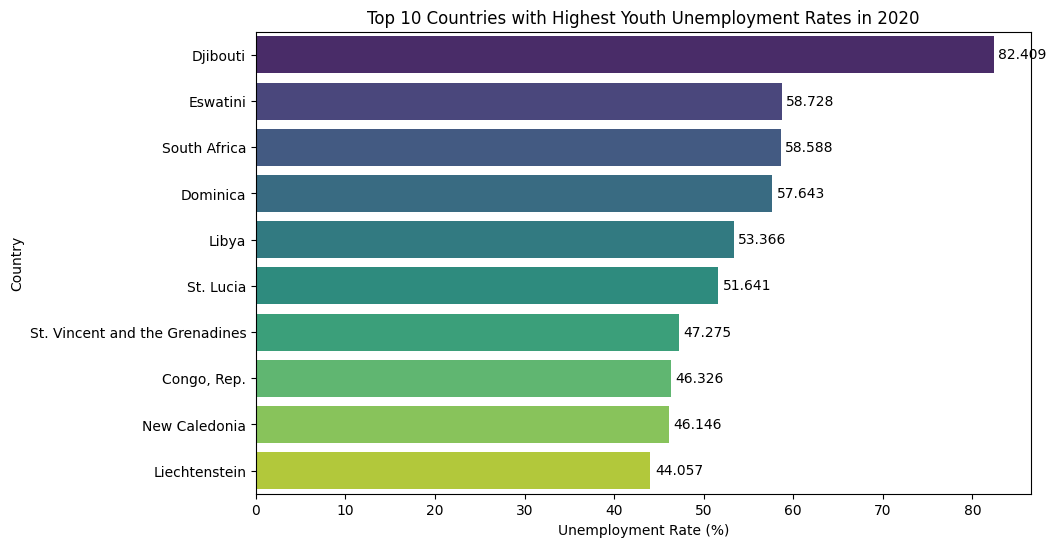

In [22]:
# 6.2 Top 10 Countries with Highest Youth Unemployment Rates in 2020
data_2020 = df[df['Year'] == 2020]
top_10_2020 = data_2020.nlargest(10, 'YouthUnemployment')
plt.figure(figsize=(10,6))
sns.barplot(data=top_10_2020, x='YouthUnemployment', y='Country', palette='viridis')
for i, v in enumerate(top_10_2020['YouthUnemployment']):
    plt.text(v + 0.5, i, str(v), color='black', va='center')
plt.title('Top 10 Countries with Highest Youth Unemployment Rates in 2020')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Country')
plt.show()

C:\Users\Huypz\AppData\Local\Temp\ipykernel_2100\2396133328.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_2020, x='YouthUnemployment', y


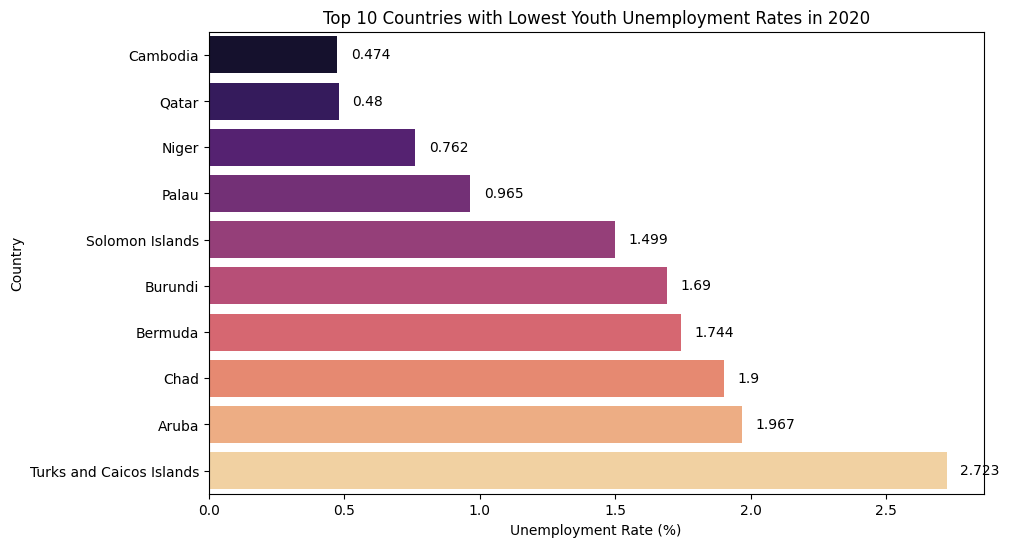

In [25]:
# 6.3 Top 10 Countries with Lowest Youth Unemployment Rates in 2020
bottom_10_2020 = data_2020.nsmallest(10, 'YouthUnemployment')
plt.figure(figsize=(10,6))
sns.barplot(data=bottom_10_2020, x='YouthUnemployment', y
='Country', palette='magma')
for i, v in enumerate(bottom_10_2020['YouthUnemployment']):
    plt.text(v + 0.05, i, str(v), color='black', va='center')
plt.title('Top 10 Countries with Lowest Youth Unemployment Rates in 2020')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Country')
plt.show()

In [27]:
!pip install prophet 

     ---------------------------------------- 0.0/50.0 kB ? eta -:--:--
     ------------------------------- ------ 41.0/50.0 kB 960.0 kB/s eta 0:00:01
     -------------------------------------- 50.0/50.0 kB 631.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.1 MB 3.3 MB/s eta 0:00:04
    --------------------------------------- 0.3/12.1 MB 3.2 MB/s eta 0:00:04
   - -------------------------------------- 0.4/12.1 MB 3.3 MB/s eta 0:00:04
   - -------------------------------------- 0.6/12.1 MB 3.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.7/12.1 MB 3.3 MB/s eta 0:00:04
   -- ------------------------------------- 0.9/12.1 MB 3.3 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/12.1 MB 3.2 MB/s eta 0:00:04
   --- ------------------------------------ 1.2/12.1 MB 3.3 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/12.1 MB 3.2 MB/s eta 0:00:04
   --

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Huypz\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\prophet\\stan_model\\cmdstan-2.37.0\\stan\\lib\\stan_math\\lib\\tbb_2020.3\\include\\tbb\\internal\\_deprecated_header_message_guard.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\Huypz\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


17:52:18 - cmdstanpy - INFO - Chain [1] start processing
17:52:19 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Huypz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


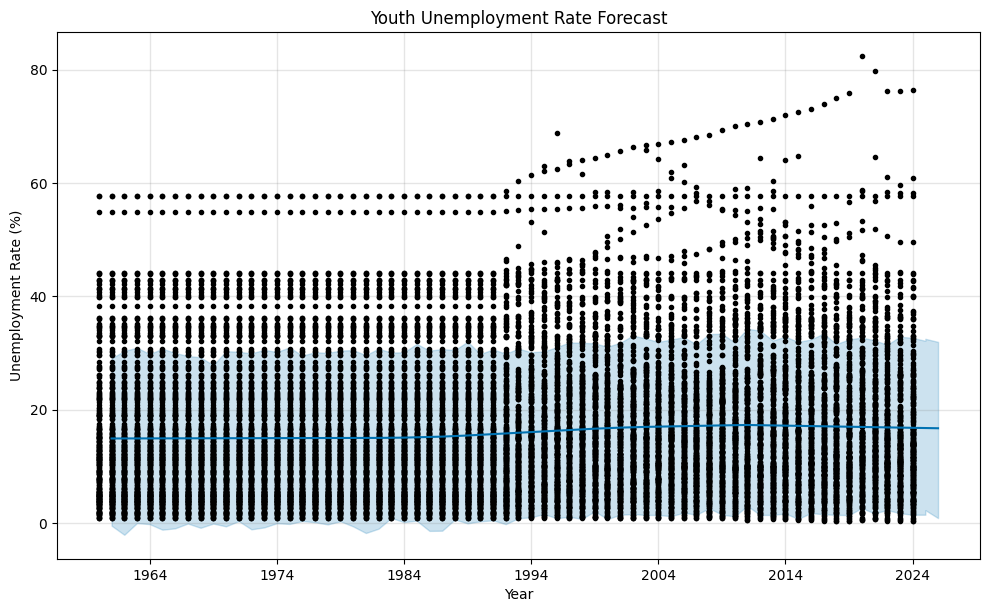

In [31]:
# 7.0 Prophet Modeling
from prophet import Prophet
# Prepare data for Prophet
prophet_df = df[['Year', 'YouthUnemployment']].copy()
prophet_df['ds'] = pd.to_datetime(prophet_df['Year'], format='%Y')
prophet_df.rename(columns={'YouthUnemployment': 'y'}, inplace=True)
prophet_df = prophet_df[['ds', 'y']]
# Initialize and fit the model
model = Prophet(
    yearly_seasonality=False,
    changepoint_prior_scale=0.05
)    
model.fit(prophet_df)
# Create future dataframe
future = model.make_future_dataframe(periods=2, freq='Y')
# Convert the date to year format
future['ds'] = future['ds'].dt.to_period('Y').dt.to_timestamp('Y')
# Make predictions
forecast = model.predict(future)
# Only show ds(year) and yhat(predicted value) and trusted values
forecast_results = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)
# Format the 'ds' column to show only the year
forecast_results['ds'] = forecast_results['ds'].dt.year
# Display the forecast results
fig = model.plot(forecast)
plt.title('Youth Unemployment Rate Forecast')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.show()


### Youth Unemployment Rate in Africa

20:31:14 - cmdstanpy - INFO - Chain [1] start processing
20:31:14 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Huypz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\prophet\forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


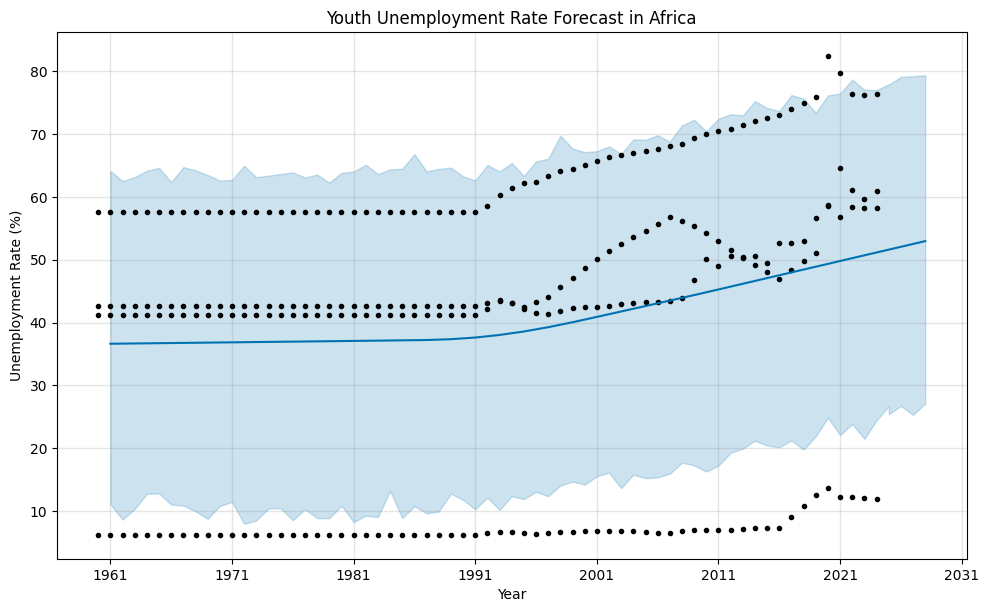

In [43]:
african_countries = ['Djibouti', 'Eswatini', 'South Africa', 'Kenya']
df_africa =df[df['Country'].isin(african_countries)].copy()
# Prepare data for Prophet
prophet_df = df_africa[['Year', 'YouthUnemployment']].copy()
prophet_df['ds'] = pd.to_datetime(prophet_df['Year'], format='%Y')
prophet_df.rename(columns={'YouthUnemployment': 'y'}, inplace=True)
prophet_df = prophet_df[['ds', 'y']]
# Initialize and fit the model
model = Prophet(
    yearly_seasonality=False,
    changepoint_prior_scale=1.5
)    
model.fit(prophet_df)
# Create future dataframe
future = model.make_future_dataframe(periods=4, freq='Y')
# Convert the date to year format
future['ds'] = future['ds'].dt.to_period('Y').dt.to_timestamp('Y')
# Make predictions
forecast = model.predict(future)
# Only show ds(year) and yhat(predicted value) and trusted values
forecast_results = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4)
# Format the 'ds' column to show only the year
forecast_results['ds'] = forecast_results['ds'].dt.year
# Display the forecast results
fig = model.plot(forecast)
plt.title('Youth Unemployment Rate Forecast in Africa')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.show()